In [302]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from create_model import load_model_no_train


In [ ]:
print(2)

In [ ]:
device = "cuda:3"
#checkpoint = "linear12903_50"
#checkpoint = "linear77575_fxj5a68i_390"
#checkpoint = "linear69376_okcpk2bv_170"
checkpoint = "linear62341_6hogpy0g_120"
model = TabPFNClassifier(device=device)#, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model.c
config["num_features"] = 2000
model_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model.max_num_features = 2000
model.model = model_pytorch

In [ ]:
import pandas as pd
# import train_test_split
from sklearn.model_selection import train_test_split

df = pd.read_csv("tabpfn/prostate.csv")

In [ ]:
X, y = df.drop(columns=["y"]), df["y"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train[X_train.columns[:5000]]
X_test = X_test[X_test.columns[:5000]]

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# compute accuracy
model.score(X_test, y_test)

In [ ]:
model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

In [ ]:
# Synthetic high dimensional data
import numpy as np
X = np.random.rand(400, 100)
number_of_relevant_features = 5
relevant_features = np.random.choice(100, number_of_relevant_features, replace=False)
W = np.random.rand(number_of_relevant_features, 1)
y = np.dot(X[:, relevant_features], W)
y = (y > np.median(y)).astype(int).flatten()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models[-1].fit(X_train, y_train)
models[-1].predict(X_test)

In [ ]:
models[-1].score(X_test, y_test)

In [ ]:
# Try with a linear model
from sklearn.linear_model import LogisticRegression
linear_model = LogisticRegression(penalty="l1", solver="liblinear")
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

In [ ]:
#from tabpfn.priors.flexible_categorical import get_batch
from tabpfn.priors.linear import get_batch as get_batch_linear
from tabpfn.priors.flexible_categorical import MulticlassRank, BalancedBinarize
hyperparameters = {"random_feature_removal": 0., "random_feature_removal_min":0.,
                  "n_relevant_features_min": 3, "n_relevant_features_max": 100,
                  "random_feature_removal_min": 0.7,
                  "sample_bigger_features": True,
                "correlation_strength_min": 0, "correlation_strength_max": 0,
                "correlation_proba_min": 0, "correlation_proba_max": 0,
                "p_categorical": 0,
                "sampling": "normal",
                "output_multiclass_ordered_p": 0.0,
                "curriculum": False,
                "seq_len_used": 50,
                "num_features_used": 100,
                "num_classes": 10,
                "balanced": False,
                  'aggregate_k_gradients': 8}
def get_batch_func(num_features, train_size, verbose=False):
    hyperparameters = {"random_feature_removal": 0., "random_feature_removal_min":0.,
                      "n_relevant_features_min": 3, "n_relevant_features_max": 100,
                      "random_feature_removal_min": 0.7,
                      "sample_bigger_features": True,
                    "correlation_strength_min": 0, "correlation_strength_max": 0,
                    "correlation_proba_min": 0, "correlation_proba_max": 0,
                    "p_categorical": 0,
                    "sampling": "normal",
                    "output_multiclass_ordered_p": 0.0,
                    "curriculum": False,
                    "seq_len_used": 50,
                    "num_features_used": 100,
                    "num_classes": 10,
                    "balanced": False,
                      'aggregate_k_gradients': 8,
  # 'recompute_attn': True,
  # 'bptt_extra_samples': None,
  # 'bptt': 1152,
  # 'dynamic_batch_size': False,
  # 'multiclass_loss_type': 'nono',
  # 'output_multiclass_ordered_p': 0.0,
  # 'normalize_with_sqrt': False,
  # 'new_mlp_per_example': True,
  # 'prior_mlp_scale_weights_sqrt': True,
  # 'batch_size_per_gp_sample': None,
  # 'normalize_ignore_label_too': False,
  # 'differentiable_hps_as_style': False,
  # 'random_feature_rotation': True,
  # 'rotate_normalized_labels': True,
  # 'normalize_on_train_only': True,
  # 'mix_activations': False,
  # 'weight_decay': 0.0,
  # 'use_flash_attention': True,
  # 'canonical_y_encoder': False,
  # 'total_available_time_in_s': None,
  # 'train_mixed_precision': True,
  # 'efficient_eval_masking': True,
  # 'hardware_batch_size': 4,
  # 'num_global_att_tokens': 0,
  # 'use_seperate_decoder': False,
  # 'attend_to_global_tokens_only_at_test': False,
  # "max_eval_pos": 1000,
  # 'lr': 0.0001,
  # 'dropout': 0.0,
  # 'emsize': 512,
  # 'batch_size': 64,
  # 'nlayers': 12,
  # 'num_features': 100,
  # 'nhead': 4,
  # 'nhid_factor': 2,
  # 'eval_positions': None,
  # 'sampling': 'mixed',
  # 'epochs': 400,
  # 'num_steps': 128,
  # 'verbose': False,
  # 'pre_sample_causes': True,
  # 'multiclass_type': 'rank',
  # 'nan_prob_unknown_reason_reason_prior': 1.0,
  # 'categorical_feature_p': 0.0, #TODO
  # 'nan_prob_no_reason': 0.0,
  # 'nan_prob_unknown_reason': 0.0,
  # 'nan_prob_a_reason': 0.0,
  # 'max_num_classes': 10,
  # 'num_classes': 10,
  # 'noise_type': 'Gaussian',
  # 'balanced': False,
  # 'normalize_to_ranking': False,
  # 'set_value_to_nan': 0.1,
  # 'normalize_by_used_features': True,
  # #'num_features_used': {'num_features_func': None},
  # 'num_categorical_features_sampler_a': -1.0,
    }
    hyperparameters['sampling'] = "mixed"
    args = {}
    args["remove_outliers_in_flexible_categorical"] = False
    args["normalize_x_in_flexible_categorical"] = False
    args["random_feature_rotation"] = False
    args["assign_class_in_flexible_categorical"] = True
    hyperparameters['normalize_labels'] = True
    hyperparameters['check_is_compatible'] = True
    hyperparameters['normalize_labels'] = True
                    
    X, y, _ = get_batch_linear(batch_size=1,
            #get_batch=get_batch_linear,
            #device=device,
            seq_len=1152,
            num_features_max=num_features,
            num_features_sampler= lambda: num_features,
            #single_eval_pos=600,
            hyperparameters=hyperparameters,
            verbose=verbose,
            **args)
    
    # # standardize y
    # y = (y - torch.mean(y)) / torch.std(y)

    class_assigner = MulticlassRank(num_classes=10, ordered_p=hyperparameters["output_multiclass_ordered_p"])
    # #class_assigner = BalancedBinarize()
    y = class_assigner(y)
    # #print(np.unique(y, return_counts=True))
    # # normalize y
    # for b in range(y.shape[1]):
    #     valid_labels = y[:,b] != -100
    #     # if self.h.get('normalize_ignore_label_too', False):
    #     #         valid_labels[:] = True
    #     y[valid_labels, b] = (y[valid_labels, b] > y[valid_labels, b].unique().unsqueeze(1)).sum(axis=0).unsqueeze(0)
    X = X.reshape(X.shape[0], X.shape[2])
    y = y.reshape(y.shape[0])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
for _ in range(100):
    X_train, X_test, y_train, y_test = get_batch_func(100, 0.8)
    print("num classes", len(np.unique(y_train)))
    models[-1].fit(X_train, y_train)
    y_pred = models[-1].predict(X_test)
    print(np.unique(y_pred, return_counts=True))

In [ ]:
for _ in range(100):
    X_train, X_test, y_train, y_test = get_batch_func(10, 300, verbose=True)
    models[-2].fit(X_train, y_train)
    y_pred = models[-2].predict(X_test)
    score = balanced_accuracy_score(y_test, y_pred, adjusted=True)
    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_test, return_counts=True))
    print("score: ", score)
    if score < 0.01:
        print("Prediction", y_pred)
        print("Reality", y_test)
        print("Trying again")
        models[-2].fit(X_train, y_train)
        y_pred =models[-2].predict(X_test)
        score = balanced_accuracy_score(y_test, y_pred, adjusted=True)
        print("score: ", score)
        print("Trying again with different split")
        X = np.concatenate([X_train, X_test], axis=0)
        y = np.concatenate([y_train, y_test], axis=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=122)
        models[-2].fit(X_train, y_train)
        y_pred = models[-2].predict(X_test)
        score = balanced_accuracy_score(y_test, y_pred, adjusted=True)
        print("score: ", score)
        break

In [ ]:
X_train.shape

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
dataloader_class

In [ ]:
# from create_model import create_dataloader
# from priors.utils import get_batch_to_dataloader
# from priors.flexible_categorical import get_batch
# dataloader_class = get_batch_to_dataloader(get_batch)
# dl, validation_dl, device= create_dataloader(dataloader_class, None, None, extra_prior_kwargs_dict={"get_batch_method": get_batch_linear,
#                                                                                                     "num_features": 1000,
#                                                                                                    "num_features_max":1000, 'num_features_sampler':lambda :1000, 
#                                                                                                    'hyperparameters': hyperparameters})

In [ ]:
# from sklearn.metrics import balanced_accuracy_score
# import torch
# import time
# single_eval_pos = 200
# pbar = enumerate(dl)
# print("len(dl)", len(dl))
# for batch, (data, targets, single_eval_pos) in pbar:
#     output = model_pytorch[2](tuple(e.to(device, non_blocking=True) if torch.is_tensor(e) else e for e in data) if (isinstance(data, tuple) or isinstance(data, list)) else data.to(device, non_blocking=True)
#                 , single_eval_pos=single_eval_pos)
#     preds_tabpfn = output[:, i, :].detach().cpu().numpy().argmax(axis=1)
#     balanced_acc_tabpfn_adjusted = balanced_accuracy_score(y_test, preds_tabpfn, adjusted=True)
#     balanced_acc_tabpfn = balanced_accuracy_score(y_test, preds_tabpfn)
#     print("balanced_acc_tabpfn", balanced_acc_tabpfn)
#     print("balanced_acc_tabpfn_adjusted", balanced_acc_tabpfn_adjusted)
#     time.sleep(1)

In [ ]:
print(2)

In [ ]:
# single_eval_pos = len(X_train)
# X = np.concatenate([X_train, X_test])
# X = torch.tensor(X.reshape(X.shape[0], 1, X.shape[1]).astype(np.float32))
# y = np.concatenate([y_train, y_test])
# y = torch.tensor(y.reshape(-1, 1).astype(np.float32))
# single_eval_pos = 100
# batch = get_batch_func(1000, 400)
# data = (0, batch[0], batch[1])
# model_py = model_pytorch[2].to("cpu")
# output = model_py(tuple(e.to("cpu") if torch.is_tensor(e) else e for e in data) if (isinstance(data, tuple) or isinstance(data, list)) else data.to("cpu")
#                 , single_eval_pos=single_eval_pos)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
rf = RandomForestClassifier()
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
clf_lasso = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
clf_l2 = LogisticRegression(random_state=0, max_iter=1000)
gbt = GradientBoostingClassifier()


In [299]:
from tabpfn.transformer import TransformerModel

In [300]:
# use config to create model
# use only the attributes that are needed to create the model
attributes = ['num_features', 'num_features_max', 'num_features_sampler', 'hyperparameters']

TypeError: __init__() got an unexpected keyword argument 'lr'

torch.Size([512, 100])

In [407]:
from create_model import get_model_no_train
from priors.utils import uniform_int_sampler_f
import torch
def load_model(checkpoint):
    with open("tabpfn/config.pkl", "rb") as f:
        config = pickle.load(f)
    checkpoint_file = f"model_{checkpoint}"
    path = f"tabpfn/model_checkpoints/{checkpoint_file}.pt"
    print(f'Loading checkpoint file {checkpoint_file}')
    loaded_data = torch.load(path, map_location="cpu")
    print("Length of loaded data", len(loaded_data))
    if len(loaded_data) == 3:
        model_state, optimizer_state, config_sample = loaded_data
    elif len(loaded_data) == 4:
        print('WARNING: Loading model with scheduler state dict')
        model_state = loaded_data["model_state_dict"]
        optimizer_state = loaded_data["optimizer_state_dict"]
        scheduler_state = loaded_data["scheduler_state_dict"]
        epoch = loaded_data["epoch"]
    else:
        model_state = loaded_data
    
    config["num_features"] = model_state["encoder.weight"].shape[1]  
    #config["num_features_used"] = {'num_features_func': uniform_int_sampler_f(3, config["num_features_no_pad"])} #TODO get rid of differentiable
    from tabpfn.utils import get_no_op_scheduler
    scheduler = get_no_op_scheduler

    from scripts.model_builder import get_model    
    transformer = get_model(config, device, should_train=False, state_dict=model_state, 
                            scheduler=get_no_op_scheduler)[2]
    transformer = transformer.to(device)
    return transformer

In [413]:
model_names = ["lasso", "l2"]
models = [clf_lasso, clf_l2]
checkpoints = ["linear20165_lxj2139t_480"]#["linear20165_lxj2139t_180", "linear40111_7ogx8xf7_660", "linear8556_2yf88mcd_690", "linear28077_28277w7g_90", "linear41122_navnrsoi_780"]
for i, checkpoint in enumerate(checkpoints):
    # num_features = num_features_list[i]
    # model = TabPFNClassifier(device=device, no_preprocess_mode=True, feature_shift_decoder=False, N_ensemble_configurations=1)
    # #model = GradientBoostingClassifier()
    # config = model.c
    # config["num_features"] = num_features
    # model.c["max_num_features"] = num_features
    # model_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
    # model.max_num_features = num_features
    # model.model = model_pytorch
    # models.append(model)
    # model_names.append(checkpoint)
    model = load_model(checkpoint)
    models.append(model)
    model_names.append(checkpoint)

Loading checkpoint file model_linear20165_lxj2139t_480
Length of loaded data 4
Using style prior: True
Num workers:  10
{'recompute_attn': True}
Using cuda:0 device
Batch size: 16
Num workers:  10
DataLoader.__dict__ {'num_features': 100, 'num_steps': 2, 'batch_size': 16, 'eval_pos_seq_len_sampler': <function create_dataloader.<locals>.eval_pos_seq_len_sampler at 0x7f73b4c99d30>, 'seq_len_maximum': 1152, 'device': 'cuda:0', 'get_batch_kwargs': {'hyperparameters': {'lr': 1e-11, 'dropout': 0.0, 'emsize': 512, 'batch_size': 16, 'nlayers': 12, 'num_features': 100, 'nhead': 8, 'nhid_factor': 2, 'eval_positions': None, 'sampling': 'normal', 'epochs': 1500, 'verbose': False, 'pre_sample_causes': True, 'multiclass_type': 'rank', 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.0, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 10, 'noise_type': 'Gaussian', 'balanced': False, 'normalize_to_ranking'

In [422]:
def predict(model_pytorch, X_train, X_test, y_train, y_test):
    num_features = model_pytorch.encoder.weight.shape[1]
    if X_train.shape[1] > num_features:
        return None
    X, y = torch.tensor(np.concatenate([X_train, X_test]).astype(np.float32)),\
        torch.tensor(np.concatenate([y_train, y_test]))
    # pad X to num_features
    X = torch.cat([X, torch.zeros((X.shape[0], num_features - X.shape[1]))], axis=1)
    # add a dimension 1 in the middle
    X = X.reshape(X.shape[0], 1, X.shape[1]).float()
    y = y.reshape(-1, 1).float()
    # replace the y after the single_eval_pos with 0
    single_eval_pos = len(X_train)
    # hide the test data to make sure it is not used
    y = torch.cat([y[:single_eval_pos], torch.zeros_like(y[single_eval_pos:])], axis=0)
    # move to device
    X, y = X.to(device), y.to(device)
    logits = model_pytorch((1, X, y), single_eval_pos=len(X_train))
    preds = logits.argmax(axis=2).detach().cpu().numpy().reshape(-1)
    return preds

In [423]:
#train_sizes = [10, 100, 600]
import pandas as pd
train_sizes = [400]
num_features_list = [10, 50, 70, 100, 150]
n_batch = 30
#scores = np.zeros((len(train_sizes), len(num_features_list), len(model_names), n_batch))
# create a pandas dataframe
recompute = False
scores = pd.DataFrame(columns=["train_size", "num_features", "model_name", "batch", "score"])
for i, train_size in enumerate(train_sizes):
    for j, num_features in enumerate(num_features_list):
        for k in range(n_batch):
            X_train, X_test, y_train, y_test = get_batch_func(num_features=num_features, train_size=train_size)
            for l, (model_name, model) in enumerate(zip(model_names, models)):
                # check if exists
                #if not recompute and scores[(scores["train_size"] == train_size) & (scores["num_features"] == num_features) & (scores["model_name"] == model_name) & (scores["batch"] == k)].shape[0] > 0:
                #print(f"skipping {train_size} {num_features} {model_name} {k}, as it already exists")
                if X_train.shape[1] > 100 and "original" in model_name:
                    scores = pd.concat([scores, pd.DataFrame([[train_size, num_features, model_name, k, np.nan]], columns=scores.columns)])
                    continue
                if np.unique(y_train).shape[0] == 1 or np.unique(y_test).shape[0] == 1:
                    scores = pd.concat([scores, pd.DataFrame([[train_size, num_features, model_name, k, np.nan]], columns=scores.columns)])
                    continue
                if "linear" in model_name:
                    print("linear")
                    y_pred = predict(model, X_train, X_test, y_train, y_test)
                    if y_pred is None:
                        scores = pd.concat([scores, pd.DataFrame([[train_size, num_features, model_name, k, np.nan]], columns=scores.columns)])
                        continue
                else:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                score = balanced_accuracy_score(y_test, y_pred, adjusted=True)
                scores = pd.concat([scores, pd.DataFrame([[train_size, num_features, model_name, k, score]], columns=scores.columns)])
                print(f"model: {model_name}, train_size: {train_size}, num_features: {num_features}, score: {score}")
                
            
            
        

model: lasso, train_size: 400, num_features: 10, score: 0.9737038925718171
model: l2, train_size: 400, num_features: 10, score: 0.9320074791772905
linear
model: linear20165_lxj2139t_480, train_size: 400, num_features: 10, score: 0.9695053544110148
model: lasso, train_size: 400, num_features: 10, score: 0.48701746378929084
model: l2, train_size: 400, num_features: 10, score: 0.5419678732724027
linear
model: linear20165_lxj2139t_480, train_size: 400, num_features: 10, score: 0.9206190029785783
model: lasso, train_size: 400, num_features: 10, score: 0.970725630644659
model: l2, train_size: 400, num_features: 10, score: 0.8654624727499223
linear
model: linear20165_lxj2139t_480, train_size: 400, num_features: 10, score: 0.9735284957957022
model: lasso, train_size: 400, num_features: 10, score: 0.13468401376742956
model: l2, train_size: 400, num_features: 10, score: 0.2235289146243892
linear
model: linear20165_lxj2139t_480, train_size: 400, num_features: 10, score: 0.5313036131482402
model: 

In [424]:
#Transform the scores into a dataframe
# import pandas as pd
# df = pd.DataFrame()
# for i, train_size in enumerate(train_sizes):
#     for j, num_features in enumerate(num_features_list):
#         for l, model_name in enumerate(model_names):
#             for k in range(n_batch):
#                 df = pd.concat([df, pd.DataFrame({"train_size": train_size, "num_features": num_features, "model_name": model_name, "score": scores[i, j, l, k]}, index=[0])], ignore_index=True)

/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


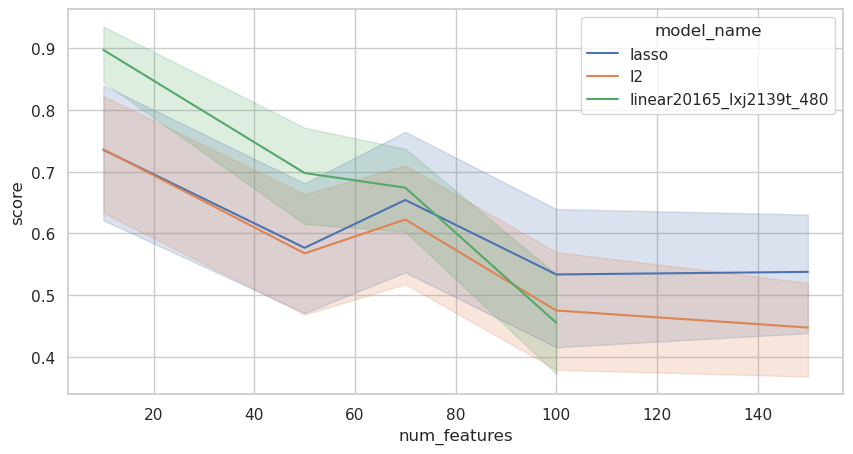

In [425]:
#df = scores[scores["train_size"] == 300].reset_index()

# plot the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# one line per model
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="num_features", y="score", hue="model_name", data=scores.reset_index())


In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
clf_lasso = LogisticRegression(random_state=0, penalty="l1", max_iter=1000, solver="liblinear")
clf_l2 = LogisticRegression(random_state=0, max_iter=1000)
gbt = GradientBoostingClassifier()

In [ ]:
import torch
n_iter = 12
res_tabpfn = []
res_lasso = []
res_linear = []
res_gbt = []
for _ in range(n_iter):
    X_train, X_test, y_train, y_test = get_batch_func()
    if np.unique(y_train).shape[0] == 1:
        continue
    model.fit(X_train, y_train)
    clf_lasso.fit(X_train, y_train)
    clf_l2.fit(X_train, y_train)
    #gbt.fit(X_train, y_train)
    res_tabpfn.append(balanced_accuracy_score(y_test, model.predict(X_test), adjusted=True))
    res_lasso.append(balanced_accuracy_score(y_test, clf_lasso.predict(X_test), adjusted=True))
    res_linear.append(balanced_accuracy_score(y_test, clf_l2.predict(X_test), adjusted=True))
    #res_gbt.append(balanced_accuracy_score(y_test, gbt.predict(X_test)))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(n_iter), res_tabpfn, label="tabpfn", alpha=0.4)
plt.scatter(range(n_iter), res_lasso, label="lasso", alpha=0.4)
plt.scatter(range(n_iter), res_linear, label="linear", alpha=0.4)
#plt.scatter(range(n_iter), res_gbt, label="gbt", alpha=0.4)
plt.legend()

# Actual data

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
rf = RandomForestClassifier()
clf_lasso = LogisticRegression(random_state=0, penalty="l1", max_iter=1000, solver="liblinear")
clf_l2 = LogisticRegression(random_state=0, max_iter=1000, penalty="l2")
gbt = GradientBoostingClassifier()
device = "cuda:3"

In [ ]:
df_train = pd.read_csv("datasets/stem-cell-predcition/train.csv")
df_test = pd.read_csv("datasets/stem-cell-predcition/test.csv")
target = "stem"
X = df_train.drop(columns=[target])
y = df_train[target]
#X_test = df_test.drop(columns=[target]) # does not exist
#y_test = df_test[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, random_state=43)

In [ ]:
print("shapes", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
model_names = ["tabpfn_5", "tabpfn_10", "lasso", "linear", "rf", "gbt"]
models = [model_5_step, model_10_step, clf_lasso, clf_l2, rf, gbt]
for model_name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name, balanced_accuracy_score(y_test, y_pred, adjusted=True))

In [ ]:
import openml
import matplotlib.pyplot as plt

In [ ]:
device = "cuda:3"

In [ ]:
tabpfn_original = TabPFNClassifier(device=device)
tabpfn_original_no_prepro = TabPFNClassifier(device=device, no_preprocess_mode=True)

In [ ]:
checkpoint = "linear65131_aajl8wbt_180"
model_curriculum2 = TabPFNClassifier(device=device, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model_curriculum2.c
config["num_features"] = 2000
model_curriculum2.c["max_num_features"] = 2000
model_curriculum_pytorch2 = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model_curriculum2.max_num_features = 2000
model_curriculum2.model = model_curriculum_pytorch2

In [ ]:
#checkpoint = "linear48760_a04e9ul7_150"
device = "cuda:3"
checkpoint = "linear28077_28277w7g_90"
model_curriculum = TabPFNClassifier(device=device, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model_curriculum.c
config["num_features"] = 2000
model_curriculum.c["max_num_features"] = 2000
model_curriculum_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model_curriculum.max_num_features = 2000
model_curriculum.model = model_curriculum_pytorch

In [ ]:
checkpoint = "linear62341_6hogpy0g_150"
model_5_step = TabPFNClassifier(device=device, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model_5_step.c
config["num_features"] = 2000
model_5_step.c["max_num_features"] = 2000
model_pytorch_5_step = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model_5_step.max_num_features = 2000
model_5_step.model = model_pytorch_5_step

In [ ]:
checkpoint = "linear44856_62y4rq7r_210"
model_10_step = TabPFNClassifier(device=device, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model_10_step.c
config["num_features"] = 2000
model_10_step.c["max_num_features"] = 2000
model_pytorch_10_step = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model_10_step.max_num_features = 2000
model_10_step.model = model_pytorch_10_step

In [ ]:
dataset_id = 45019
#dataset_id = 1480
#dataset_id = 1510
#dataset_id = 1467
import openml
dataset = openml.datasets.get_dataset(dataset_id)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=700, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_5_step.fit(X_train, y_train)
#model_5_step.predict(X_test)

In [ ]:
model_5_step.fit(X_train, y_train)
model_5_step.predict(X_test)

In [ ]:
dataset_ids = [45021]#[45019, 1467, 1480, 1510]
model_names = ["tabpfn_original", "tabpfn_original_no_prepro", "tabpfn_5", "tabpfn_10", "lasso", "linear", "rf"]
models = [tabpfn_original, tabpfn_original_no_prepro, model_5_step, model_10_step, clf_lasso, clf_l2, rf]
n_folds = 6
all_scores = np.zeros((len(dataset_ids), len(model_names), n_folds))
for dataset_id in dataset_ids:
    dataset = openml.datasets.get_dataset(dataset_id)
    X, y, categorical_indicator, attribute_names = dataset.get_data(
        dataset_format="array", target=dataset.default_target_attribute
    )
    for model_name, model in zip(model_names, models):
        print(model_name)
        # cross validation
        for k in range(n_folds):
            try:
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400, random_state=42+k)
                model.fit(X_train, y_train)
                all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), k] = balanced_accuracy_score(y_test, model.predict(X_test), adjusted=False)
            except:
                print(f"error on {dataset_id} {model_name} {k}")
        #scores = cross_val_score(model, X, y, cv=n_folds, scoring="balanced_accuracy", fit_params={"overwrite_warning": True} if model_name.startswith("tabpfn") else {}) #reset the model
        #all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :] = scores

In [ ]:
# plot results with subplots per dataset
# replace 0 by nan
all_scores[all_scores == 0] = np.nan
fig, axes = plt.subplots(nrows=1, ncols=len(dataset_ids) + 1, figsize=(25, 10))
for i, dataset_id in enumerate(dataset_ids):
    for j, (model_name, model) in enumerate(zip(model_names, models)):
        if "tabpfn" in model_name:
            # fill box in red
            if "original" in model_name:
                axes[i].boxplot(all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :], positions=[model_names.index(model_name)], widths=0.6, boxprops=dict(color="green"))
            else:
                axes[i].boxplot(all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :], positions=[model_names.index(model_name)], widths=0.6, boxprops=dict(color="red"))
        else:
            axes[i].boxplot(all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :], positions=[model_names.index(model_name)], widths=0.6, boxprops=dict(color="blue"))
        axes[i].set_xticks(range(len(model_names)))
        axes[i].set_xticklabels(model_names)
        axes[i].set_title(f"dataset {dataset_id}")
        axes[i].set_ylabel("balanced accuracy")
        axes[i].grid(True)
        # rotate x tick labels
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)

In [ ]:
all_scores

In [ ]:
# plot results with subplots per dataset
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=len(dataset_ids), figsize=(20, 10))
for i, dataset_id in enumerate(dataset_ids):
    for j, (model_name, model) in enumerate(zip(model_names, models)):
        if "tabpfn" in model_name:
            # fill box in red
            axes[i].boxplot(all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :], positions=[model_names.index(model_name)], widths=0.6, boxprops=dict(color="red"))
        else:
            axes[i].boxplot(all_scores[dataset_ids.index(dataset_id), model_names.index(model_name), :], positions=[model_names.index(model_name)], widths=0.6)
        axes[i].set_xticks(range(len(model_names)))
        axes[i].set_xticklabels(model_names)
        axes[i].set_title(f"dataset {dataset_id}")
        axes[i].set_ylabel("balanced accuracy")
        axes[i].grid(True)

In [ ]:
all_scores

In [ ]:
from sklearn.metrics import accuracy_score
print("Score tabpfn", accuracy_score(y_test, model.predict(X_test)))
print("Score lasso", accuracy_score(y_test, clf_lasso.predict(X_test)))
print("Score linear", accuracy_score(y_test, clf_l2.predict(X_test)))
print("Score rf", accuracy_score(y_test, rf.predict(X_test)))

In [ ]:
X = X.reshape(X.shape[0], X.shape[2])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.predict(X_test)

In [ ]:
import torch
import numpy as np
# Baselines
# Predict the most common class
most_common_class = np.bincount(y_train.reshape(-1)).argmax()
print(f"Accuracy: {torch.sum(y_test == most_common_class) / len(y_test)}")

least_common_class = np.bincount(y_train.reshape(-1)).argmin()
print(f"Accuracy: {torch.sum(y_test == least_common_class) / len(y_test)}")


In [ ]:
# Lasso for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier().fit(X_train, y_train)
clf = LogisticRegression(random_state=0, penalty="l1", solver="saga", max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
import scipy

In [ ]:
import time
import numpy as np

In [ ]:
start = time.time()
for i in range(10):
    normal = scipy.stats.norm.rvs(loc=0, scale=1, size=(1000, 1, 10000), random_state=None)
print(time.time() - start)

In [ ]:
start = time.time()
for i in range(1):
    normal = np.random.normal(loc=0, scale=1, size=(1000, 1, 10000))
print(time.time() - start)

In [ ]:
from numba import njit

@njit(parallel=True)
def generate_random_values(shape):
    return np.random.normal(0, 1, shape)

# Call the function once to compile it
_ = generate_random_values((1, 1))

# Now you can use the optimized function
random_values = generate_random_values((1000, 10000))

In [ ]:
start = time.time()
for i in range(10):
    random_values = generate_random_values((1000, 1, 10000))
print(time.time() - start)

In [ ]:
import torch

In [ ]:
start = time.time()
torch.normal(mean=torch.zeros(1000, 10, 10000), std=torch.ones(1000, 10, 10000))
print(time.time() - start)

In [ ]:
from tabpfn.priors.trees import get_batch
from tabpfn.priors.flexible_categorical import MulticlassRank, BalancedBinarize, MulticlassValue
import numpy as np

hyperparameters = {"n_estimators_lambda": 0.15, "max_depth_lambda": 0.35,
                   "n_estimators": None,
                   "num_classes": 10,
                   "randomize_leaves": False,
                   "return_classes": False,
                   "correlation_strength_min": 0, "correlation_strength_max": 0,
                   "correlation_proba_min": 0, "correlation_proba_max": 0,
                   "p_categorical": 0,
                   "sampling": "normal",
                   "output_multiclass_ordered_p": 0.0,
}
                   
X, y, _ = get_batch(batch_size=1,
          seq_len=1000,
          num_features=2,
          hyperparameters=hyperparameters)

# normalize y
y = (y - y.min()) / (y.std())
class_assigner = MulticlassRank(num_classes=10, ordered_p=hyperparameters["output_multiclass_ordered_p"])
#class_assigner = MulticlassValue(num_classes=hyperparameters["num_classes"])
#class_assigner = BalancedBinarize()
y = class_assigner(y)

In [ ]:
import numpy as np
np.unique(y, return_counts=True)

In [ ]:
X

In [ ]:
import matplotlib.pyplot as plt
X = X.reshape(X.shape[0], X.shape[2])
plt.scatter(X[:, 0], X[:, 1], c=y)